In [3]:
pip install python-okx

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
fiona 1.9.5 requires click~=8.0, but you have click 7.1.2 which is incompatible.
poetry 1.3.2 requires importlib-metadata<5.0,>=4.4; python_version < "3.10", but you have importlib-metadata 7.0.1 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install okx

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 493.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 kB 898.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 1.8 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 4.0 MB/s eta 0:00:0000:0100:01
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:
      Successfully uninstalled numpy-1.22.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
ERROR: pip's dependency resolver does not currently take

In [1]:
from okx.api import Account
from okx.api import Trade
from okx_api import Market as Market_api
from pprint import pprint
import json
import os
import time
import math
from dotenv import load_dotenv
from okx.app import OkxSPOT
load_dotenv()

/Users/wangqiqian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/wangqiqian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


True

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [46]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
market = Market_api(key = '', secret = '', passphrase = '', flag = '0')
okxSPOT = OkxSPOT(
    key="",
    secret="",
    passphrase="",
)

In [18]:
print(market.get_history_candles.__doc__)


        https://www.okx.com/docs-v5/zh/#rest-api-market-data-get-candlesticks-history

        请求参数：
        Parameter         	Type    	Required	Description
        instId            	String  	是       	产品ID，如BTC-USD-200927
        after             	String  	否       	请求此时间戳之前（更旧的数据）的分页内容，传的值为对应接口的ts
        before            	String  	否       	请求此时间戳之后（更新的数据）的分页内容，传的值为对应接口的ts
        bar               	String  	否       	时间粒度，默认值1m如 /3m/5m/15m/30m/1H/2H/4H]香港时间开盘价k线：[6H/12H/1D/2D/3D/1W/1M/3M]UTC时间开盘价k线：[6Hutc/12Hutc/1Dutc/2Dutc/3Dutc/1Wutc/1Mutc/3Mutc]
        limit             	String  	否       	分页返回的结果集数量，最大为100，不填默认返回100条
        


In [159]:
# https://www.okx.com/docs-v5/zh/?python#order-book-trading-market-data-get-candlesticks-history
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'volCcy', 'volCcyQuote', 'confirm']
date_string_after = ['2023-1-31','2023-2-28','2023-3-31','2023-4-30','2023-5-31','2023-6-30',
                     '2023-7-31','2023-8-31','2023-9-30','2023-10-31','2023-11-30','2023-12-31']
date_range = pd.date_range(start = '2024-01-01', end = '2024-12-31', freq = 'D') # this can optimize

full_data = pd.DataFrame(columns = ['open', 'high', 'low', 'close'])

for m in range(1, 13):
    
    month = "2023-" + str(m) + "-1"
    time_before = datetime.strptime(month, "%Y-%m-%d").timestamp()
    time_after = datetime.strptime(date_string_after[m - 1], "%Y-%m-%d").timestamp()

    result = market.get_history_candles(
        instId =  'BTC-USDT',
        before = str(round(time_before * 1000)), after = str(round(time_after * 1000)), 
        bar = '1D'
    )
    # print(len(result['data']))
    data = pd.DataFrame(result['data'], columns = columns)
    data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')
    data.sort_values(by = 'date', inplace = True)
    data.set_index('date', inplace = True)
    data[['open', 'high', 'low', 'close']] = data[['open', 'high', 'low', 'close']].apply(pd.to_numeric)
    data.drop(['volume', 'timestamp', 'confirm', 'volCcyQuote', 'volCcy'], axis = 1, inplace = True)
    full_data = pd.concat([full_data, data])
    # print(data)
    # arima_data = data["open"]
    
print(full_data)

                            open     high      low    close
2023-01-01 16:00:20.480  16560.0  16768.4  16548.1  16735.5
2023-01-02 15:59:56.928  16735.4  16799.3  16621.3  16679.8
2023-01-03 15:59:33.376  16679.8  16915.3  16610.4  16855.0
2023-01-04 15:59:09.824  16855.8  16988.0  16760.1  16846.8
2023-01-05 16:00:57.344  16846.8  16876.7  16680.7  16843.2
...                          ...      ...      ...      ...
2023-12-25 15:59:37.472  43616.8  43718.5  42111.0  42392.8
2023-12-26 15:59:13.920  42392.8  43227.7  41610.0  42977.9
2023-12-27 16:01:01.440  42979.6  43788.6  42398.0  42444.9
2023-12-28 16:00:37.888  42445.2  43113.6  42105.3  42266.2
2023-12-29 16:00:14.336  42266.1  42449.6  41267.1  42374.8

[341 rows x 4 columns]


<AxesSubplot: >

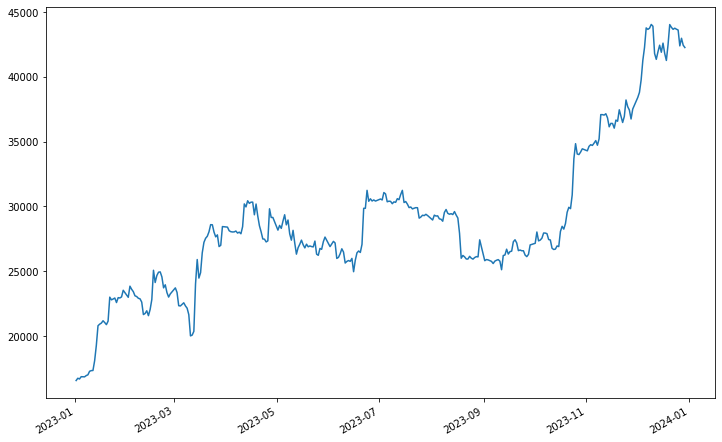

In [161]:
full_data['open'].plot(figsize = (12,8))

### There are four plots, each means:
1. open price
2. long-term trend
3. seasonal
4. residual

<Figure size 432x288 with 0 Axes>

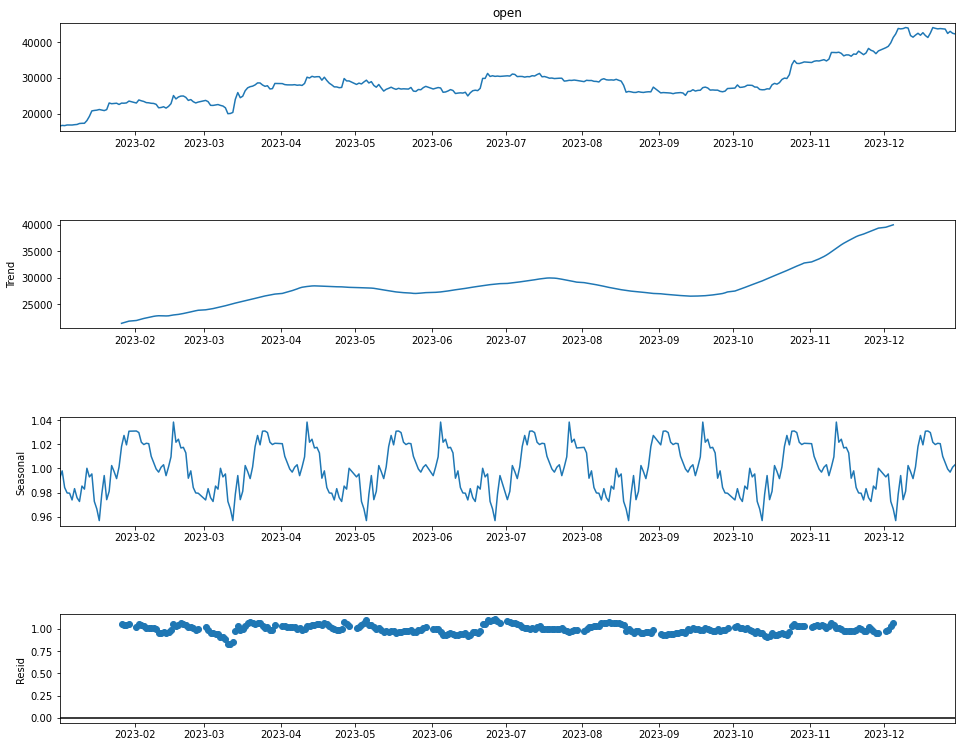

In [162]:
result_add = seasonal_decompose(full_data['open'], model = 'multiplicative', period = 50)
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure()  
    fig = result_add.plot()  
    fig.set_size_inches(15, 12)

## Stationary test: Dickey-Fuller

In [163]:
def adf_test(timeseries):
    
    print("Results of Dickey-Fuller Test\n================================================")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = [
        "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    print("================================================")  
    #寫個自動判斷式
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing!")
adf_test(full_data['open'])

Results of Dickey-Fuller Test
Test Statistic                  -0.922523
p-value                          0.780465
#Lags Used                       1.000000
Number of Observations Used    339.000000
Criterical Value (1%)           -3.449788
Criterical Value (5%)           -2.870104
Criterical Value (10%)          -2.571332
dtype: float64
The data is non-stationary, so do differencing!


Results of Dickey-Fuller Test
Test Statistic                -1.665251e+01
p-value                        1.599532e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.390000e+02
Criterical Value (1%)         -3.449788e+00
Criterical Value (5%)         -2.870104e+00
Criterical Value (10%)        -2.571332e+00
dtype: float64
The data is stationary. (Criterical Value 1%)


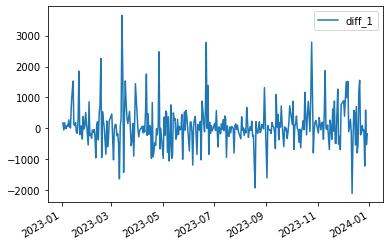

In [164]:
# 一階差分，扣掉前一天的資料
diff_1 = full_data['open'] - full_data['open'].shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()
diff_1.plot(figsize = (6, 4), label = "diff_1")
plt.legend()

adf_test(diff_1)

### You can choose the params by using:
- ACF(Autocorrelation Function)
- PACF(Partial Autocorrelation Function)
- AIC(Akaike Information Criterion)
- BIC(Bayesian Information Criterion)
- MSE(Mean Square Error)
- MAE(Mean Absolute Error)

### AIC / PACF

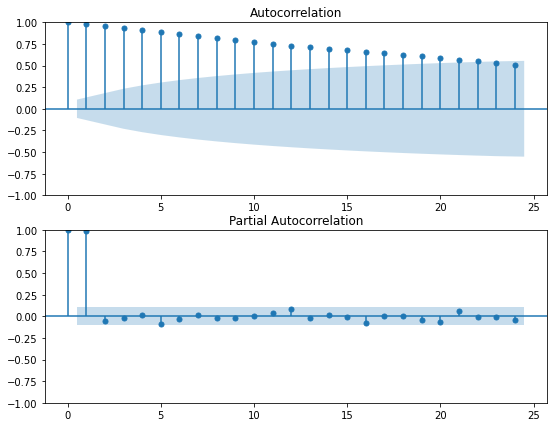

In [165]:
fig = plt.figure(facecolor = "white", figsize = (9,7))
ax1 = fig.add_subplot(211)
plot_acf(full_data['open'], lags = 24, ax = ax1)
ax2 = fig.add_subplot(212)
plot_pacf(full_data['open'], lags = 24, ax = ax2)
plt.show()

In [59]:
def arima_AIC(data, p = 4, d = 3, q = 4):
    
    best_AIC =["pdq", 10000]
    L = len(data)
    AIC = []
    name = []
    for i in range(p):
        for j in range(1, d):
            for k in range(q):            
                model = sm.tsa.arima.ARIMA(data, order = (i,j,k))
                fitted = model.fit()
                AIC.append(fitted.aic)
                name.append(f"ARIMA({i},{j},{k})")
                print(f"ARIMA({i},{j},{k})：AIC = {fitted.aic}")
                if fitted.aic < best_AIC[1]:
                    best_AIC[0] = f"ARIMA({i}, {j}, {k})"
                    best_AIC[1] = fitted.aic
    print("==========================================================================")
    print(f"This best model is {best_AIC[0]} based on argmin AIC.")
    
arima_AIC(full_data['open'], 4,2,3)

ARIMA(0,1,0)：AIC = 5392.555643139118
ARIMA(0,1,1)：AIC = 5390.547474940099
ARIMA(0,1,2)：AIC = 5392.521695183719
ARIMA(1,1,0)：AIC = 5390.746514239621
ARIMA(1,1,1)：AIC = 5392.466964457948
ARIMA(1,1,2)：AIC = 5394.630432400934
ARIMA(2,1,0)：AIC = 5392.407776062551
ARIMA(2,1,1)：AIC = 5394.418453353452
ARIMA(2,1,2)：AIC = 5394.611633557032
ARIMA(3,1,0)：AIC = 5394.375365837797
ARIMA(3,1,1)：AIC = 5394.489099899816
ARIMA(3,1,2)：AIC = 5387.7046732795
This best model is ARIMA(3, 1, 2) based on argmin AIC.


## This is for testing prediction

In [ ]:
## need update

## This is for real prediction

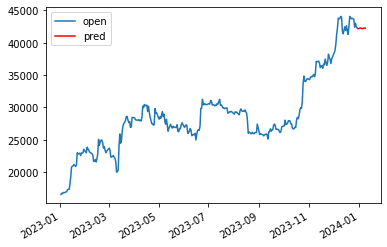

In [174]:
model = sm.tsa.ARIMA(full_data['open'], order=(3, 1, 2)).fit()

# Plotting the historical data
fig, ax = plt.subplots()
ax = full_data['open'].plot(ax = ax)

your_number_of_steps = 10
forecast = model.forecast(steps = your_number_of_steps)

# Create predict date
last_date = full_data.index[-1]
forecast_index = pd.date_range(start = last_date, periods = your_number_of_steps + 1, freq = 'D')[1:]

forecast_index

ax.plot(forecast_index, forecast, color = 'red', label = 'pred')

plt.legend()
plt.show()

In [153]:
forecast

341    42165.472702
342    42147.641074
343    42216.003671
344    42268.241885
345    42231.204601
346    42160.753858
347    42157.431278
348    42223.058187
349    42262.363824
350    42221.161788
Name: predicted_mean, dtype: float64